## Least Squares Problem

Suppose that the $m \times n$ matrix $A$ is tall, so the system of linear equations $A x=b$, where $b$ is an $m$-vector, is over-determined, i.e., there are more equations $(m)$ than variables to choose $(n)$. These equations have a solution only if $b$ is a linear combination of the columns of $A$.

For most choices of $b$, however, there is no $n$-vector $x$ for which $A x=b$. As a compromise, we seek an $x$ for which $r=A x-b$, which we call the residual (for the equations $A x=b$), is as small as possible. This suggests that we should choose $x$ so as to minimize the norm of the residual, $\|A x-b\|$. If we find an $x$ for which the residual vector is small, we have $A x \approx b$, i.e., $x$ almost satisfies the linear equations $A x=b$. (Some authors define the residual as $b-A x$, which will not affect us since $\|A x-b\|=\|b-A x\|$.)

Minimizing the norm of the residual and its square are the same, so we can just as well minimize
$$
\|A x-b\|^2=\|r\|^2=r_1^2+\cdots+r_m^2
$$
the sum of squares of the residuals. The problem of finding an $n$-vector $\hat{x}$ that minimizes $\|A x-b\|^2$, over all possible choices of $x$, is called the least squares problem. It is denoted using the notation
$$
\text { minimize }\|A x-b\|^2 \text {, }
$$
where we should specify that the __variable__ is $x$ (meaning that we should choose $x$).

The matrix $A$ and the vector $b$ are called the __data__ for the problem, which means that they are given to us when we are asked to choose $x$. The quantity to be minimized, $\|A x-b\|^2$, is called the __objective function__ (or just objective) of the least squares problem.

The problem is sometimes called __linear least squares__ to emphasize that the residual $r$ (whose norm squared we are to minimize) is an affine function of $x$, and to distinguish it from the nonlinear least squares problem, in which we allow the residual $r$ to be an arbitrary function of $x$. We will study the nonlinear least squares problem in a later chapter.

Any vector $\hat{x}$ that satisfies $\|A \hat{x}-b\|^2 \leq\|A x-b\|^2$ for all $x$ is a solution of the least squares problem. Such a vector is called a least squares approximate solution of $A x=b$. It is very important to understand that a least squares approximate solution $\hat{x}$ of $A x=b$ need not satisfy the equations $A \hat{x}=b$; it simply makes the norm of the residual as small as it can be. Some authors use the confusing phrase '$\hat{x}$ solves $A x=b$ in the least squares sense', but we emphasize that a least squares approximate solution $\hat{x}$ does not, in general, solve the equation $A x=b$.

If $\|A \hat{x}-b\|$ (which we call the __optimal residual norm__) is small, then we can say that $\hat{x}$ __approximately__ solves $A x=b$. On the other hand, if there is an $n$-vector $x$ that satisfies $A x=b$, then it is a solution of the least squares problem, since its associated residual norm is zero.

Another name for the least squares problem, typically used in data fitting applications, is __regression__. We say that $\hat{x}$, a solution of the least squares problem, is the result of regressing the vector $b$ onto the columns of $A$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
A = np.matrix([[2, 0], [-1, 1], [0, 2]])
b = np.array([1, 0, -1])

xhat = np.array([1 / 3, -1 / 3])

rhat = np.matmul(A, xhat) - b

x = np.array([1 / 2, -1 / 2])
r = np.matmul(A, x) - b

rhat

matrix([[-0.33333333, -0.66666667,  0.33333333]])

In [ ]:
AT = A.transpose()
rbar = AT @ rhat.transpose()

In [ ]:
xbar = np.matmul(np.linalg.inv(AT @ A) @ AT, b)
xbar

matrix([[ 0.33333333, -0.33333333]])

In [ ]:
x1, x2 = np.linalg.lstsq(A, b, rcond=None)[0]
x1, x2

(0.33333333333333326, -0.3333333333333334)

#### Complexity

In [ ]:
A = np.random.randint(0, 100, size=(30000, 4))
AT = A.transpose()
b = np.random.randint(0, 100, size=(30000, 1))

In [ ]:
A.shape

(4, 30)

In [ ]:
%timeit np.matmul(np.linalg.inv(AT @ A) @ AT, b)

1.96 ms ± 596 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%timeit np.linalg.lstsq(A, b, rcond=None)[0]

1.76 ms ± 187 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
A_tensor = torch.from_numpy(A).float()
b_tensor = torch.from_numpy(b).float()

In [ ]:
%timeit torch.linalg.lstsq(A_tensor, b_tensor, rcond=None)[0].to(device)

519 µs ± 7.78 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


## Examples

#### Advertising purchases.

We have $m$ demographic groups or audiences that we want to advertise to, with a target number of impressions or views for each group, which we give as a vector $v^{\text {des }}$. (The entries are positive.) To reach these audiences, we purchase advertising in $n$ different channels (say, different web publishers, radio, print, ...), in amounts that we give as an $n$-vector $s$. (The entries of $s$ are nonnegative, which we ignore.) The $m \times n$ matrix $R$ gives the number of impressions in each group per dollar spending in the channels: $R_{i j}$ is the number of impressions in group $i$ per dollar spent on advertising in channel $j$. (These entries are estimated, and are nonnegative.) The $j$ th column of $R$ gives the effectiveness or reach (in impressions per dollar) for channel $j$. The $i$ th row of $R$ shows which media demographic group $i$ is exposed to. The total number of impressions in each demographic group is the $m$-vector $v$, which is given by $v=R s$. The goal is to find $s$ so that $v=R s \approx v^{\text {des }}$. We can do this using least squares, by choosing $s$ to minimize $\left\|R s-v^{\text {des }}\right\|^2$. (We are not guaranteed that the resulting channel spend vector will be nonnegative.) This least squares formulation does not take into account the total cost of the advertising; we will see in chapter 16 how this can be done.

> We consider a simple numerical example, with $n=3$ channels and $m=10$ demographic groups, and matrix
$$
R=\left[\begin{array}{lll}
0.97 & 1.86 & 0.41 \\
1.23 & 2.18 & 0.53 \\
0.80 & 1.24 & 0.62 \\
1.29 & 0.98 & 0.51 \\
1.10 & 1.23 & 0.69 \\
0.67 & 0.34 & 0.54 \\
0.87 & 0.26 & 0.62 \\
1.10 & 0.16 & 0.48 \\
1.92 & 0.22 & 0.71 \\
1.29 & 0.12 & 0.62
\end{array}\right]
$$
with units of 1000 views per dollar. The entries of $R$ range over an 18:1 range, so the 3 channels are quite different in terms of their audience reach.
>
> We take $v^{\text {des }}=\left(10^3\right) \mathbf{1}$, i.e., our goal is to reach one million customers in each of the 10 demographic groups. Least squares gives the advertising budget allocation
$$
\hat{s}=(62,100,1443),
$$
which achieves a views vector with RMS error 132 , or $13.2 \%$ of the target values.


In [ ]:
# advertising budget
R = np.matrix(
    [
        [0.97, 1.86, 0.41],
        [1.23, 2.18, 0.53],
        [0.8, 1.24, 0.62],
        [1.29, 0.98, 0.51],
        [1.1, 1.23, 0.69],
        [0.67, 0.34, 0.54],
        [0.87, 0.26, 0.62],
        [1.1, 0.16, 0.48],
        [1.92, 0.22, 0.71],
        [1.29, 0.12, 0.62],
    ]
)
m, n = np.shape(R)
vdes = 1e3 * np.ones(m)
s = np.linalg.lstsq(R, vdes, rcond=None)[0]
s

array([  62.07662454,   99.98500403, 1442.83746254])

In [ ]:
def rms(x):
    return np.sqrt(np.mean(np.square(x)))


rms(np.matmul(R, s) - vdes)

132.63819026326527

### Least squares data fitting

Least squares is widely used as a method to construct a mathematical model from some data, experiments, or observations. Suppose we have an $n$-vector $x$, and a scalar $y$, and we believe that they are related, perhaps approximately, by some function $f: \mathbf{R}^n \rightarrow \mathbf{R}$ :
$$
y \approx f(x)
$$

The vector $x$ might represent a set of $n$ feature values, and is called the feature vector or the vector of independent variables, depending on the context. The scalar $y$ represents some outcome (also called response variable) that we are interested in. Or $x$ might represent the previous $n$ values of a time series, and $y$ represents the next value.

#### Data

We don't know $f$, although we might have some idea about its general form. But we do have some data, given by
$$
x^{(1)}, \ldots, x^{(N)}, \quad y^{(1)}, \ldots, y^{(N)}
$$
where the $n$-vector $x^{(i)}$ is the feature vector and the scalar $y^{(i)}$ is the associated value of the outcome for data sample $i$. We sometimes refer to the pair $x^{(i)}, y^{(i)}$ as the $i$ th data pair. These data are also called observations, examples, samples, or measurements, depending on the context. Here we use the superscript $(i)$ to denote the $i$ th data point: $x^{(i)}$ is an $n$-vector, the $i$ th independent variable; the number $x_j^{(i)}$ is the value of $j$ th feature for example $i$.

In [ ]:
# Generate 10 data points
x = np.linspace(0, 10, 10)

# Generate noise
noise = np.random.normal(0, 1, 10)

# Create the data
y = 2 * x + 5 + noise


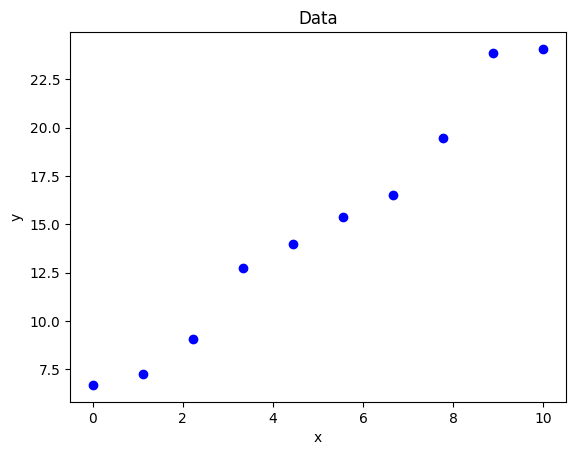

In [ ]:
# Visualize the data
fig = plt.figure()
plt.plot(x, y, 'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()
plt.close(fig)


#### Linear in the parameters model

We will focus on a specific form for the model, which has the form
$$
\hat{f}(x)=\theta_1 f_1(x)+\cdots+\theta_p f_p(x),
$$
where $f_i: \mathbf{R}^n \rightarrow \mathbf{R}$ are basis functions or feature mappings that we choose, and $\theta_i$ are the model parameters that we choose. This form of model is called linear in the parameters, since for each $x, \hat{f}(x)$ is a linear function of the model parameter $p$-vector $\theta$. The basis functions are usually chosen based on our idea of what $f$ looks like. (We will see many examples of this below.) Once the basis functions have been chosen, there is the question of how to choose the model parameters, given our set of data.

In [ ]:
# Define different basis functions
def f1(x):
    return np.ones_like(x)

def f2(x):
    return x

def f3(x):
    return x**2

def f4(x):
    return x**3


#### Model

We will form a model of the relationship between $x$ and $y$, given by
$$
y \approx \hat{f}(x)
$$
where $\hat{f}: \mathbf{R}^n \rightarrow \mathbf{R}$. We write $\hat{y}=\hat{f}(x)$, where $\hat{y}$ is the (scalar) prediction (of the outcome $y$ ), given the independent variable (vector) $x$. The hat appearing over $f$ is traditional notation that suggests that the function $\hat{f}$ is an approximation of the function $f$. The function $\hat{f}$ is called the model, prediction function, or predictor. For a specific value of the feature vector $x, \hat{y}=\hat{f}(x)$ is the prediction of the outcome.

In [ ]:
def linear_model(theta, x, basis):
    # Theta is the parameter vector
    # x is the data
    return theta[0] * basis[0](x) + theta[1] * basis[1](x)


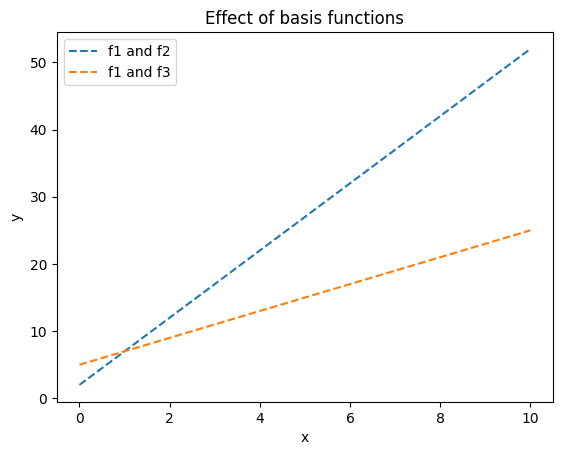

In [ ]:
# Evaluate the linear model with different basis functions
y1 = linear_model([2, 5], x, [f1, f2])
y2 = linear_model([2, 5], x, [f2, f1])

# Plot the results
plt.plot(x, y1, '--', label='f1 and f2')
plt.plot(x, y2, '--', label='f1 and f3')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Effect of basis functions')
plt.legend()
plt.show()


#### Prediction error

Our goal is to choose the model $\hat{f}$ so that it is consistent with the data, i.e., we have $y^{(i)} \approx \hat{f}\left(x^{(i)}\right)$, for $i=1, \ldots, N$. (There is another goal in choosing $\hat{f}$, that we will discuss in $\S 13.2$.) For data sample $i$, our model predicts the value $\hat{y}^{(i)}=\hat{f}\left(x^{(i)}\right)$, so the prediction error or residual for this data point is
$$
r^{(i)}=y^{(i)}-\hat{y}^{(i)}.
$$
(Some authors define the prediction error in the opposite way, as $\hat{y}^{(i)}-y^{(i)}$. We will see that this does not affect the methods developed in this chapter.)

In [ ]:
def prediction_error(theta, x, y):
    # Calculate the predictions
    y_hat = linear_model(theta, x, [f1, f2])

    # Calculate the prediction error
    e = np.abs(y - y_hat)

    return e

Text(0, 0.5, 'MSE')

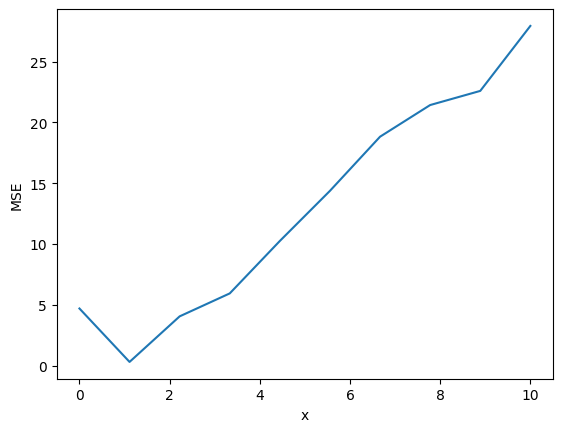

In [ ]:
theta_opt = np.array([2, 5])  # Optimal parameters

# Calculate the prediction error for different values of theta
e = prediction_error(theta_opt, x, y)

# Plot the prediction error
plt.plot(x, e)
plt.xlabel('x')
plt.ylabel('MSE')

#### Least squares model fitting.

A very common method for choosing the model parameters $\theta_1, \ldots, \theta_p$ is to minimize the RMS prediction error on the given data set, which is the same as minimizing the sum of squares of the prediction errors, $\left\|r^{\mathrm{d}}\right\|^2$. We now show that this is a least squares problem.
Expressing $\hat{y}^{(i)}=\hat{f}\left(x^{(i)}\right)$ in terms of the model parameters, we have
$$
\hat{y}^{(i)}=A_{i 1} \theta_1+\cdots+A_{i p} \theta_p, \quad i=1, \ldots, N,
$$
where we define the $N \times p$ matrix $A$ as
$$
A_{i j}=\hat{f}_j\left(x^{(i)}\right), \quad i=1, \ldots, N, \quad j=1, \ldots, p,
$$
and the $p$-vector $\theta$ as $\theta=\left(\theta_1, \ldots, \theta_p\right)$. The $j$ th column of $A$ is the $j$ th basis function, evaluated at each of the data points $x^{(1)}, \ldots, x^{(N)}$. Its $i$ th row gives the values of the $p$ basis functions on the $i$ th data point $x^{(i)}$. In matrix-vector notation we have
$$
\hat{y}^{\mathrm{d}}=A \theta .
$$

This simple equation shows how our choice of model parameters maps into the vector of predicted values of the outcomes in the $N$ different experiments. We know the matrix $A$ from the given data points, and choice of basis functions; our goal is to choose the $p$-vector of model coefficients $\theta$.
The sum of squares of the residuals is then
$$
\left\|r^{\mathrm{d}}\right\|^2=\left\|y^{\mathrm{d}}-\hat{y}^{\mathrm{d}}\right\|^2=\left\|y^{\mathrm{d}}-A \theta\right\|^2=\left\|A \theta-y^{\mathrm{d}}\right\|^2 .
$$
(In the last step we use the fact that the norm of a vector is the same as the norm of its negative.) Choosing $\theta$ to minimize this is evidently a least squares problem, of the same form as (12.1). Provided the columns of $A$ are linearly independent, we can solve this least squares problem to find $\hat{\theta}$, the model parameter values that minimize the norm of the prediction error on our data set, as
$$
\hat{\theta}=\left(A^T A\right)^{-1} A^T y^{\mathrm{d}}=A^{\dagger} y^{\mathrm{d}} .
$$

We say that the model parameter values $\hat{\theta}$ are obtained by least squares fitting on the data set.

We can interpret each term in $\left\|y^{\mathrm{d}}-A \theta\right\|^2$. The term $\hat{y}^{\mathrm{d}}=A \theta$ is the $N$-vector of measurements or outcomes that is predicted by our model, with the parameter vector $\theta$. The term $y^{\mathrm{d}}$ is the $N$-vector of actual observed or measured outcomes. The difference $y^{\mathrm{d}}-A \theta$ is the $N$-vector of prediction errors. Finally, $\left\|y^{\mathrm{d}}-A \theta\right\|^2$ is the sum of squares of the prediction errors, also called the residual sum of squares (RSS). This is minimized by the least squares fit $\theta=\hat{\theta}$.

The number $\left\|y^{\mathrm{d}}-A \hat{\theta}\right\|^2$ is called the minimum sum square error (for the given model basis and data set). The number $\left\|y^{\mathrm{d}}-A \hat{\theta}\right\|^2 / N$ is called the minimum mean square error (MMSE) (of our model, on the data set). Its squareroot is the minimum RMS fitting error. The model performance on the data set can be visualized by plotting $\hat{y}^{(i)}$ versus $y^{(i)}$ on a scatter plot, with a dashed line showing $\hat{y}=y$ for reference.

Since $\left\|y^{\mathrm{d}}-A \theta\right\|^2=\left\|A \theta-y^{\mathrm{d}}\right\|^2$, the same least squares model parameter is obtained when the residual or prediction error is defined as $\hat{y}^{\mathrm{d}}-y^{\mathrm{d}}$ instead of (our definition) $y^{\mathrm{d}}-\hat{y}^{\mathrm{d}}$. The residual sum of squares, minimum mean square error, and RMS fitting error also agree using this alternate definition of prediction error.

In [ ]:
# Define the least squares cost function
def least_squares_cost(theta, x, y):
    errors = y - linear_model(theta, x, [f1, f2])
    return np.sum(errors ** 2)


A = np.vstack([f1(x), f2(x)]).T
b = y.reshape(-1, 1)
N = len(x)

# Optimize the parameters
theta_opt = np.linalg.lstsq(A, b, rcond=None)[0]

# Calculate the prediction error
e = y - linear_model(theta_opt, x, [f1, f2])

# Calculate the residual sum of squares (RSS)
rss = np.sum(e**2)

# Calculate the minimum sum square error (MSSE)
msse = rss / N

# Calculate the minimum RMS fitting error
rmse = msse**0.5

print("Least squares model parameters:", theta_opt.flatten())
print("Residual sum of squares (RSS):", rss)
print("Minimum sum square error (MSSE):", msse)
print("Minimum RMS fitting error:", rmse)

Least squares model parameters: [5.69913163 1.8403002 ]
Residual sum of squares (RSS): 8.514260741837454
Minimum sum square error (MSSE): 0.8514260741837454
Minimum RMS fitting error: 0.9227275189262242


#### Time series trend.

Suppose the data represents a series of samples of a quantity $y$ at time (epoch) $x^{(i)}=i$. The straight-line fit to the time series data,
$$
\hat{y}^{(i)}=\theta_1+\theta_2 i, \quad i=1, \ldots, N
$$
is called the trend line. Its slope, which is $\theta_2$, is interpreted as the trend in the quantity over time. Subtracting the trend line from the original time series we get the de-trended time series, $y^{\mathrm{d}}-\hat{y}^{\mathrm{d}}$. The de-trended time series shows how the time series compares with its straight-line fit: When it is positive, it means the time series is above its straight-line fit, and when it is negative, it is below the straight-line fit.

In [ ]:
# @title petrol array
petrol = np.array(
    [
        63122,
        60953,
        59551,
        58785,
        59795,
        60083,
        61819,
        63107,
        64978,
        66090,
        66541,
        67186,
        67396,
        67619,
        69006,
        70258,
        71880,
        73597,
        74274,
        75975,
        76928,
        77732,
        78457,
        80089,
        83063,
        84558,
        85566,
        86724,
        86046,
        84972,
        88157,
        89105,
        90340,
        91195,
    ]
)

In [ ]:
len(petrol)

34

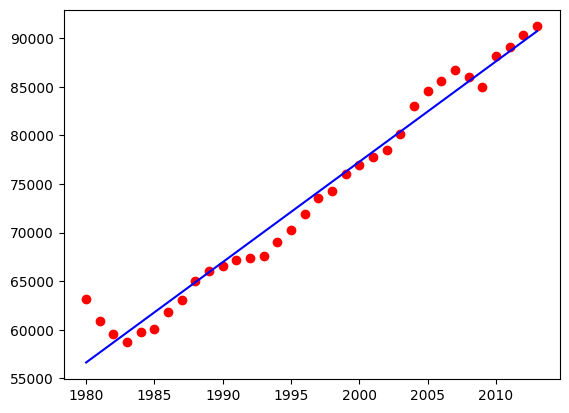

In [ ]:
# petrol consumption per year via straight-line fit
n = len(petrol)
A = np.matrix([np.ones(n), np.linspace(1, n, n)]).transpose()

x = np.linalg.lstsq(A, petrol, rcond=None)[0]

fig, ax = plt.subplots()
ax.scatter(range(1980, 2014), petrol, c='r')
ax.plot(range(1980, 2014), np.matmul(A, x).transpose(), 'b-')
plt.show()
plt.close(fig)

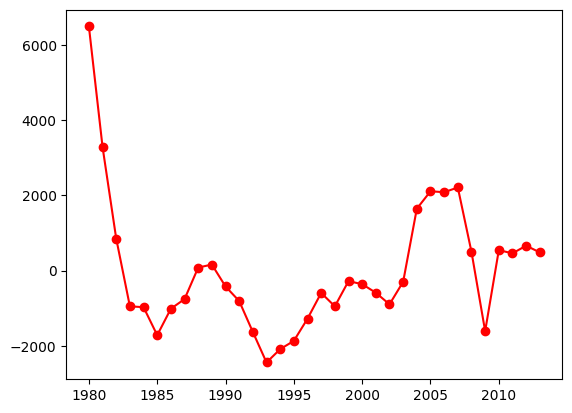

In [ ]:
fig, ax = plt.subplots()
de_trended = petrol.flatten() - np.matmul(A, x).transpose().A1
ax.plot(range(1980, 2014), de_trended, 'ro-')
plt.show()
plt.close(fig)

In [ ]:
# @title miles array
miles = np.array(
    [
        [
            203442,
            199261,
            232490,
            227698,
            242501,
            242963,
            245140,
            247832,
            227899,
            236491,
            222819,
            218390,
        ],
        [
            209685,
            200876,
            232587,
            232513,
            245357,
            243498,
            250363,
            253274,
            226312,
            241050,
            230511,
            229584,
        ],
        [
            215215,
            208237,
            236070,
            237226,
            251746,
            247868,
            256392,
            258666,
            233625,
            245556,
            230648,
            234260,
        ],
        [
            218534,
            203677,
            236679,
            239415,
            253244,
            252145,
            262105,
            260687,
            237451,
            254048,
            233698,
            238538,
        ],
        [
            222450,
            213709,
            251403,
            250968,
            257235,
            257383,
            265969,
            262836,
            243515,
            254496,
            239796,
            245029,
        ],
        [
            224072,
            219970,
            253182,
            250860,
            262678,
            263816,
            267025,
            265323,
            242240,
            251419,
            243056,
            245787,
        ],
        [
            233302,
            220730,
            256645,
            250665,
            263393,
            263805,
            263442,
            265229,
            245624,
            257961,
            245367,
            248208,
        ],
        [
            233799,
            219221,
            259740,
            252734,
            267646,
            265475,
            267179,
            271401,
            246050,
            261505,
            245928,
            240444,
        ],
        [
            233469,
            221728,
            252773,
            252699,
            261890,
            256152,
            262152,
            261228,
            238701,
            256402,
            237009,
            242326,
        ],
        [
            224840,
            218031,
            247433,
            251481,
            258793,
            258487,
            265026,
            260838,
            242034,
            252683,
            237342,
            239774,
        ],
        [
            220177,
            210968,
            251858,
            254014,
            257401,
            260159,
            265861,
            264358,
            244712,
            256867,
            239656,
            240932,
        ],
        [
            222724,
            213547,
            250410,
            249309,
            254145,
            258025,
            260317,
            260623,
            241764,
            252058,
            238278,
            244615,
        ],
        [
            226834,
            218714,
            253785,
            249567,
            261355,
            260534,
            260880,
            264983,
            239001,
            254170,
            240734,
            238876,
        ],
        [
            228607,
            216306,
            250496,
            252116,
            263923,
            260023,
            264570,
            268609,
            242582,
            259281,
            240146,
            241365,
        ],
        [
            226444,
            215166,
            252089,
            257947,
            268075,
            264868,
            272335,
            271018,
            249125,
            267185,
            242816,
            253618,
        ],
    ]
)

In [ ]:
# miles traveled per month via periodic component to a time series
print(miles.shape)
m = np.shape(miles)[0] * np.shape(miles)[1]

A = np.hstack((np.arange(0, m)[:, np.newaxis], np.vstack([np.eye(12) for i in range(15)])))
print(A.shape)
b = np.ravel(miles)[:, np.newaxis]  # reshape(vmt',m,1)
x = np.linalg.lstsq(A, b, rcond=None)[0]
x

(15, 12)
(180, 13)


array([[9.68786706e+01],
       [2.14768458e+05],
       [2.05108046e+05],
       [2.39511101e+05],
       [2.38852356e+05],
       [2.49433477e+05],
       [2.48391198e+05],
       [2.53197986e+05],
       [2.53644374e+05],
       [2.31129496e+05],
       [2.44401750e+05],
       [2.28747005e+05],
       [2.30912926e+05]])

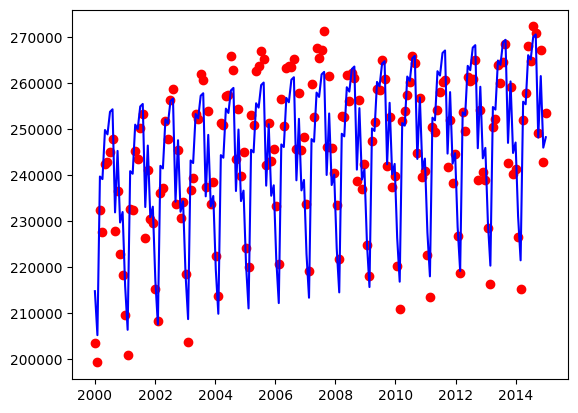

In [ ]:
fig, ax = plt.subplots()
ax.scatter(np.linspace(2000, 2015, m), b, c='r')
ax.plot(np.linspace(2000, 2015, m), np.matmul(A, x), 'b-')
plt.show()
plt.close(fig)

#### Polynomial fit.

A simple extension beyond the straight-line fit is a polynomial fit, with
$$
f_i(x)=x^{i-1}, \quad i=1, \ldots, p,
$$
so $\hat{f}$ is a polynomial of degree at most $p-1$,
$$
\hat{f}(x)=\theta_1+\theta_2 x+\cdots+\theta_p x^{p-1} .
$$
(Note that here, $x^i$ means the generic scalar value $x$ raised to the $i$ th power; $x^{(i)}$ means the $i$ th observed scalar data value.) In this case the matrix $A$ has the form
$$
A=\left[\begin{array}{cccc}
1 & x^{(1)} & \cdots & \left(x^{(1)}\right)^{p-1} \\
1 & x^{(2)} & \cdots & \left(x^{(2)}\right)^{p-1} \\
\vdots & \vdots & & \vdots \\
1 & x^{(N)} & \cdots & \left(x^{(N)}\right)^{p-1}
\end{array}\right]
$$
i.e., it is a __Vandermonde matrix__. Its columns are linearly independent provided the numbers $x^{(1)}, \ldots, x^{(N)}$ include at least $p$ different values.

In [ ]:
size = 100
t = -1 + 2 * np.random.rand(size)
noise = 0.1 * np.random.randn(size)
y = t**3 - t + 0.4 / (1 + 25 * t**2) + noise

In [ ]:
np.vander(t, 3)

array([[ 2.05260734e-03, -4.53057098e-02,  1.00000000e+00],
       [ 7.14798625e-01, -8.45457643e-01,  1.00000000e+00],
       [ 2.10731711e-01,  4.59055237e-01,  1.00000000e+00],
       [ 3.49193669e-01, -5.90926111e-01,  1.00000000e+00],
       [ 5.14037986e-01, -7.16964425e-01,  1.00000000e+00],
       [ 1.87008744e-01,  4.32445077e-01,  1.00000000e+00],
       [ 5.49768257e-03, -7.41463591e-02,  1.00000000e+00],
       [ 3.97566653e-01, -6.30528868e-01,  1.00000000e+00],
       [ 2.62333547e-01,  5.12185071e-01,  1.00000000e+00],
       [ 1.13008969e-02, -1.06305677e-01,  1.00000000e+00],
       [ 1.32719468e-01, -3.64306833e-01,  1.00000000e+00],
       [ 9.19219841e-01,  9.58759533e-01,  1.00000000e+00],
       [ 3.21545917e-02, -1.79317015e-01,  1.00000000e+00],
       [ 2.20597192e-01,  4.69677753e-01,  1.00000000e+00],
       [ 7.44017467e-03,  8.62564471e-02,  1.00000000e+00],
       [ 1.17004462e-01, -3.42059149e-01,  1.00000000e+00],
       [ 1.21116374e-01,  3.48017778e-01

In [ ]:
def polyfit(x, y, deg):
    return np.linalg.lstsq(np.vander(x, deg + 1), y, rcond=None)[0]

def model(theta, x):
    return np.matmul(np.vander(x, len(theta)), theta)

In [ ]:
theta2 = polyfit(t, y, 2)
theta6 = polyfit(t, y, 6)
theta10 = polyfit(t, y, 10)
theta15 = polyfit(t, y, 15)

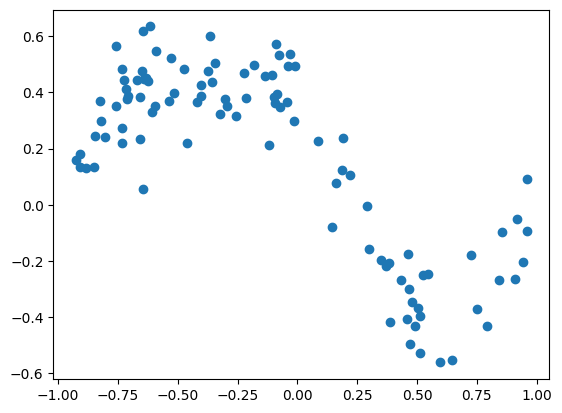

In [ ]:
t_plot = np.linspace(-1, 1, 1000)
fig = plt.figure()
plt.scatter(t, y)
plt.show()
plt.close(fig)

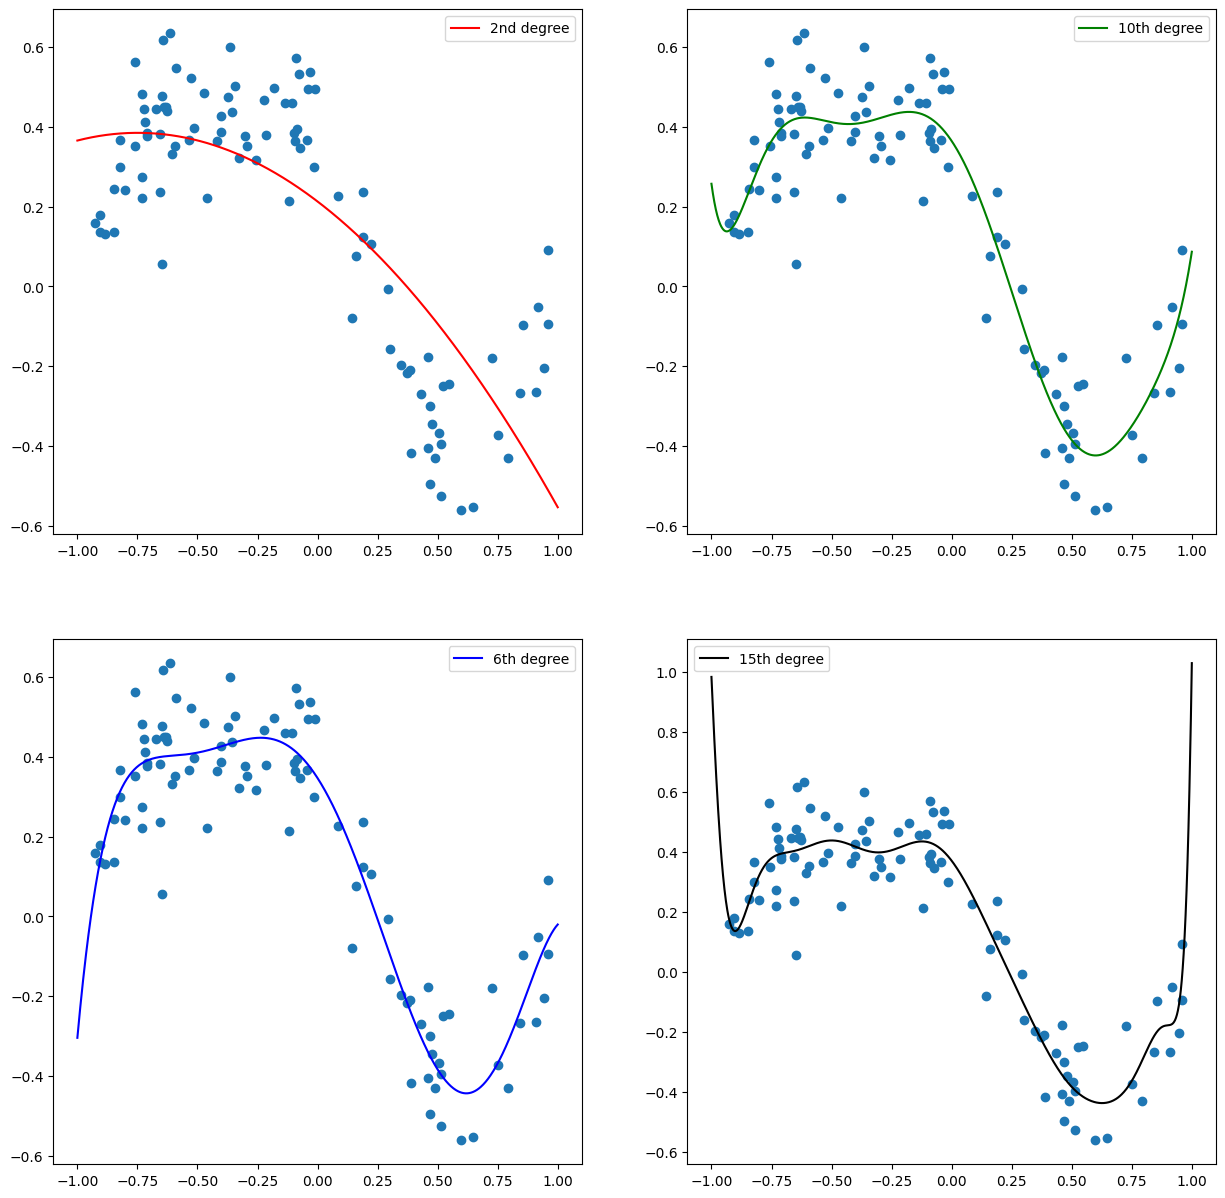

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].scatter(t, y)
ax[0, 0].plot(t_plot, model(theta2, t_plot), "r", label='2nd degree')
ax[0, 0].legend(loc='best')
ax[1, 0].scatter(t, y)
ax[1, 0].plot(t_plot, model(theta6, t_plot), "b", label='6th degree')
ax[1, 0].legend(loc='best')
ax[0, 1].scatter(t, y)
ax[0, 1].plot(t_plot, model(theta10, t_plot), "g", label='10th degree')
ax[0, 1].legend(loc='best')
ax[1, 1].scatter(t, y)
ax[1, 1].plot(t_plot, model(theta15, t_plot), "k", label='15th degree')
ax[1, 1].legend(loc='best')
plt.show()

#### Piecewise-linear fit.

A piecewise-linear function, with knot points or kink points $a_1<a_2<\cdots<a_k$, is a continuous function that is affine in between the knot points. (Such functions should be called piecewise-affine.) We can describe any piecewise-linear function with $k$ knot points using the $p=k+2$ basis functions
$$
f_1(x)=1, \quad f_2(x)=x, \quad f_{i+2}(x)=\left(x-a_i\right)_{+}, \quad i=1, \ldots, k,
$$
where $(u)_{+}=\max \{u, 0\}$. For these basis functions with $k=2$ knots and knot points will be at $a_1=-1, a_2=1$.

In [ ]:
def max_fun(x):
    return np.maximum(x, 0)

In [ ]:
x_plot = np.linspace(-1, 1, 100)

fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].plot(x_plot, np.ones_like(x_plot), label='f1(x)')
ax[1, 0].plot(x_plot, x_plot, label='f2(x)')
ax[0, 1].plot(x_plot, max_fun(x_plot + 1), label='f3(x)')
ax[1, 1].plot(x_plot, max_fun(1 - x_plot), label='f4(x)')
plt.show()
plt.close(fig)

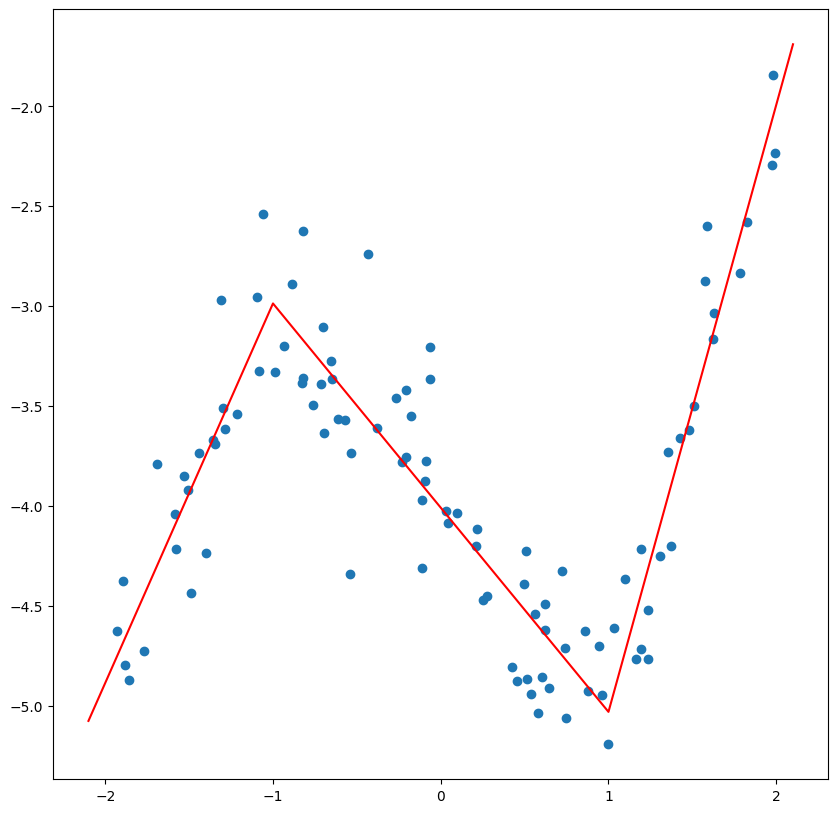

In [ ]:
size = 100
x = -2 + 4 * np.random.rand(size, 1)

x_plus_1 = max_fun(x + 1)
x_minus_1 = max_fun(x - 1)

noise = 0.3 * np.random.randn(size, 1)

y = 1 + 2 * (x - 1) - 3 * x_plus_1 + 4 * x_minus_1 + noise


A = np.hstack((
    np.ones((size, 1)),
    x,
    x_plus_1,
    x_minus_1
))
theta = np.linalg.lstsq(A, y, rcond=None)[0]

t = np.array([-2.1, -1, 1, 2.1])
t_plus_1 = max_fun(t + 1)
t_minus_1 = max_fun(t - 1)

yhat = theta[0] + theta[1] * t + theta[2] * t_plus_1 + theta[3] * t_minus_1

fig = plt.figure(figsize=(10, 10))
plt.scatter(x, y)
plt.plot(t, yhat, 'r-')
plt.show()
plt.close(fig)

### Validation

#### Generalization ability.

In this section we address a key point in model fitting: The goal of model fitting is typically not to just achieve a good fit on the given data set, but rather to achieve a good fit on new data that we have not yet seen. This leads us to a basic question: How well can we expect a model to predict $y$ for future or other unknown values of $x$ ? Without some assumptions about the future data, there is no good way to answer this question.

If a model predicts the outcomes for new unseen data values as well, or nearly as well, as it predicts the outcomes on the data used to form the model, it is said to have good __generalization ability__. In the opposite case, when the model makes predictions on new unseen data that are much worse than the predictions on the data used to form the model, the model is said to have __poor generalization ability__. So our question is: How can we assess the generalization ability of a model?

#### Validation on a test set.

A simple but effective method for assessing the generalization ability of a model is called __out-of-sample validation__. We divide the data we have into two sets: A __training set__ and a __test set__ (also called a __validation set__). This is often done randomly, with $80 \%$ of the data put into the training set and $20 \%$ put into the test set. A common way to describe this is to say that "$20 \%$ of the data were reserved for validation". Another common choice for the split ratio between the training set and the test set is $90 \%-10 \%$.  

To fit our model, we use _only the data in the training set_. The model that we come up with is based only on the data in the training set; the data in the test set has never been 'seen' by the model. Then we judge the model by its RMS fit on the _test set_. Since the model was developed without any knowledge of the test set data, the test data are effectively data that are new and unseen, and the performance of our model on this data gives us at least an idea of how our model will perform on new, unseen data. If the RMS prediction error on the test set is much larger than the RMS prediction error on the training set, we conclude that our model has poor generalization ability. Assuming that the test data are 'typical' of future data, the RMS prediction error on the test set is what we might guess our RMS prediction error will be on new data.

If the RMS prediction error of the model on the training set is similar to the RMS prediction error on the test set, we have increased confidence that our model has reasonable generalization ability.

> For example, if our model achieves an RMS prediction error of $10 \%$ (compared to $\mathbf{r m s}(y))$ on the training set and $11 \%$ on the test set, we can guess that it will have a similar RMS prediction error on other unseen data. But there is no guarantee of this, without further assumptions about the data. The basic assumption we are making here is that the future data will 'look like' the test data, or that the test data were 'typical'.

#### Over-fitting

When the RMS prediction error on the training set is much smaller than the RMS prediction error on the test set, we say that the model is __over-fit__. It tells us that, for the purposes of making predictions on new, unseen data, the model is much less valuable than its performance on the training data suggests. Roughly speaking, an over-fit model trusts the data it has seen (i.e., the training set) too much; it is too sensitive to the changes in the data that will likely be seen in the future data. One method for avoiding over-fit is to keep the model simple; another technique, called regularization. Over-fit can be detected and (one hopes) avoided by validating a model on a test set.

#### Model prediction quality and generalization ability.

Model generalization ability and training set prediction quality are not the same. A model can perform poorly and yet have good generalization ability.

> As an example, consider the (very simple) model that always makes the prediction $\hat{y}=0$. This model will (likely) perform poorly on the training set and the test set data, with similar RMS errors, assuming the two data sets are 'similar'. So this model has good generalization ability, but has poor prediction quality. In general, we seek a model that makes good predictions on the training data set and also makes good predictions on the test data set. In other words, we seek a model with good performance and generalization ability. We care much more about a model's performance on the test data set than the training data set, since its performance on the test data set is much more likely to predict how the model will do on (other) unseen data.

#### Choosing among different models.

We can use least squares fitting to fit multiple models to the same data. For example, in univariate fitting, we can fit a constant, an affine function, a quadratic, or a higher order polynomial. Which is the best model among these? Assuming that the goal is to make good predictions on new, unseen data, _we should choose the model with the smallest RMS prediction error on the test set_. Since the RMS prediction error on the test set is only a guess about what we might expect for performance on new, unseen data, we can soften this advice to _we should choose a model that has test set RMS error that is near the minimum over the candidates_. If multiple candidates achieve test set performance near the minimum, we should choose the 'simplest' one among these candidates.

We observed earlier that when we add basis functions to a model, our fitting error on the training data can only decrease (or stay the same). But this is not true for the test error. The test error need not decrease when we add more basis functions. Indeed, when we have too many basis functions, we can expect over-fit, i.e., larger error on the test set.

If we have a sequence of basis functions $f_1, f_2, \ldots$ we can consider models based on using just $f_1$ (which is often the constant function 1 ), then $f_1$ and $f_2$, and so on. As we increase $p$, the number of basis functions, our training error will go down (or stay the same). But the test error typically decreases at first and then starts to increase for larger $p$. The intuition for this typical behavior is that for $p$ too small, our model is 'too simple' to fit the data well, and so cannot make good predictions; when $p$ is too large, our model is 'too complex' and suffers from over-fit, and so makes poor predictions. Somewhere in the middle, where the model achieves near minimum test set performance, is a good choice (or several good choices) of $p$.

In [ ]:
# np.random.seed(1234)

size = 100
t = -1 + 2 * np.random.rand(size, 1)
y = t**3 - t + 0.4 / (1 + 25 * t**2) + 0.1 * np.random.randn(size, 1)

m = 100
t_test = -1 + 2 * np.random.rand(m, 1)
y_test = t_test**3 - t_test + 0.4 / (1 + 25 * t_test**2) + 0.1 * np.random.randn(m, 1)

n_poly = 20
error_train = np.zeros(n_poly)
error_test = np.zeros(n_poly)

for p in range(n_poly):
    A = np.vander(np.hstack(t), p)
    theta = np.linalg.lstsq(A, y, rcond=None)[0]
    error_train[p] = np.linalg.norm(np.matmul(A, theta) - y) / np.linalg.norm(y)
    error_test[p] = np.linalg.norm(
        np.matmul(np.vander(np.hstack(t_test), p), theta) - y_test
    ) / np.linalg.norm(y_test)

    print(
        f"The train error is {error_train[p]:.3e} and the test error is {error_test[p]:.3e} when order {p + 1}."
    )

The train error is 1.000e+00 and the test error is 1.000e+00 when order 1.
The train error is 9.782e-01 and the test error is 9.713e-01 when order 2.
The train error is 7.769e-01 and the test error is 6.220e-01 when order 3.
The train error is 7.411e-01 and the test error is 5.893e-01 when order 4.
The train error is 4.170e-01 and the test error is 3.976e-01 when order 5.
The train error is 3.805e-01 and the test error is 3.681e-01 when order 6.
The train error is 3.805e-01 and the test error is 3.681e-01 when order 7.
The train error is 3.631e-01 and the test error is 3.488e-01 when order 8.
The train error is 3.591e-01 and the test error is 3.564e-01 when order 9.
The train error is 3.584e-01 and the test error is 3.491e-01 when order 10.
The train error is 3.572e-01 and the test error is 3.494e-01 when order 11.
The train error is 3.536e-01 and the test error is 3.451e-01 when order 12.
The train error is 3.536e-01 and the test error is 3.450e-01 when order 13.
The train error is 3.

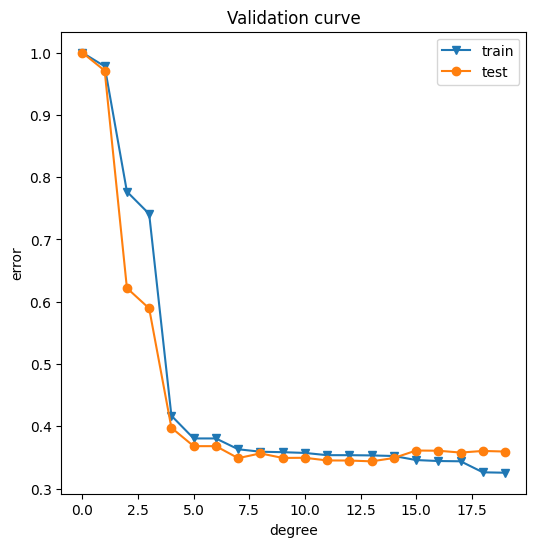

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.plot(range(n_poly), error_train, marker="v")
plt.plot(range(n_poly), error_test, marker="o")
# plt.yscale('log')
plt.legend(["train", "test"])
plt.xlabel("degree")
plt.ylabel("error")
plt.title("Validation curve")
plt.show()
plt.close(fig)

#### Cross-validation.

Cross-validation is an extension of out-of-sample validation that can be used to get even more confidence in the generalization ability of a model, or more accurately, a choice of basis functions used to construct a model. We divide the original data set into 10 sets, called __folds__. We then fit the model using folds $1,2, \ldots, 9$ as training data, and fold 10 as test data. (So far, this is the same as out-of-sample validation.) We then fit the model using folds $1,2, \ldots, 8, 10$ as training data and fold 9 as the test data. We continue, fitting a model for each choice of one of the folds as the test set. We end up with 10 (presumably different) models, and 10 assessments of these models using the fold that was not used to fit the model. (We have described 10-fold cross-validation here; 5-fold cross-validation is also commonly used.) If the test fit performance of these 10 models is similar, we can expect the same, or at least similar, performance on new unseen data. In cross-validation we can also check for _stability_ of the model coefficients. This means that the model coefficients found in the different folds are similar to each other. Stability of the model coefficients further enhances our confidence in the model.

To obtain a single number that is our guess of the prediction RMS error we can expect on new, unseen data, it is common practice to compute the RMS test set error across all 10 folds. For example, if $\epsilon_1, \ldots, \epsilon_{10}$ are the RMS prediction errors obtained by our models on the test folds, we take
$$
\sqrt{\left(\epsilon_1^2+\cdots+\epsilon_{10}^2\right) / 10}
$$
as our guess of the RMS error our models might make on new data. The single number is called the __RMS cross-validation error__, or simply the __RMS test error__ (when cross-validation is used).

In [ ]:
# @title house price data

house_sales = {
    "baths": np.array(
        [
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            1,
            1,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            3,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            1,
            3,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            1,
            2,
            1,
            3,
            2,
            3,
            2,
            2,
            2,
            1,
            3,
            2,
            2,
            3,
            2,
            3,
            4,
            3,
            1,
            3,
            3,
            2,
            2,
            3,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            4,
            2,
            3,
            1,
            2,
            1,
            1,
            1,
            1,
            2,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            2,
            1,
            1,
            2,
            1,
            2,
            2,
            1,
            1,
            2,
            2,
            1,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            1,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            3,
            1,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            1,
            2,
            3,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            3,
            2,
            3,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            3,
            1,
            2,
            2,
            2,
            2,
            2,
            3,
            4,
            2,
            2,
            3,
            4,
            2,
            1,
            2,
            1,
            3,
            4,
            3,
            2,
            3,
            3,
            2,
            3,
            5,
            2,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            1,
            2,
            1,
            1,
            1,
            1,
            2,
            1,
            1,
            2,
            1,
            1,
            2,
            2,
            1,
            2,
            1,
            2,
            2,
            2,
            1,
            2,
            2,
            1,
            2,
            2,
            1,
            1,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            1,
            2,
            1,
            2,
            1,
            2,
            3,
            2,
            1,
            2,
            2,
            2,
            3,
            1,
            2,
            2,
            1,
            3,
            2,
            1,
            2,
            2,
            2,
            2,
            1,
            3,
            2,
            2,
            1,
            2,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            3,
            2,
            2,
            3,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            1,
            2,
            3,
            2,
            3,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            3,
            3,
            3,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            1,
            3,
            2,
            3,
            3,
            3,
            2,
            2,
            4,
            3,
            2,
            4,
            3,
            2,
            2,
            2,
            2,
            3,
            3,
            3,
            3,
            1,
            1,
            1,
            1,
            1,
            2,
            1,
            1,
            1,
            1,
            2,
            1,
            1,
            2,
            1,
            2,
            1,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            1,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            1,
            2,
            2,
            2,
            2,
            3,
            1,
            1,
            2,
            1,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            1,
            2,
            1,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            3,
            3,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            3,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            2,
            2,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            2,
            2,
            2,
            2,
            2,
            3,
            1,
            2,
            2,
            2,
            3,
            2,
            1,
            2,
            3,
            1,
            3,
            3,
            3,
            2,
            3,
            2,
            1,
            1,
            3,
            4,
            3,
            3,
            2,
            1,
            1,
            1,
            1,
            1,
            2,
            2,
            1,
            2,
            1,
            2,
            2,
            1,
            1,
            1,
            1,
            1,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            1,
            2,
            1,
            2,
            1,
            2,
            1,
            1,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            1,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            1,
            1,
            3,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            1,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            1,
            2,
            2,
            2,
            2,
            2,
            2,
            1,
            1,
            1,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
        ]
    ),
    "location": np.array(
        [
            2,
            2,
            2,
            3,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            2,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            2,
            3,
            2,
            3,
            2,
            3,
            3,
            3,
            3,
            2,
            3,
            3,
            4,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            3,
            2,
            2,
            2,
            3,
            2,
            2,
            3,
            3,
            3,
            3,
            2,
            3,
            2,
            3,
            2,
            3,
            2,
            3,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            1,
            3,
            3,
            2,
            2,
            3,
            2,
            2,
            3,
            2,
            3,
            3,
            4,
            3,
            3,
            3,
            3,
            2,
            3,
            3,
            2,
            3,
            2,
            1,
            3,
            4,
            3,
            3,
            3,
            2,
            4,
            3,
            3,
            3,
            4,
            2,
            2,
            1,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            3,
            2,
            3,
            2,
            3,
            3,
            3,
            2,
            2,
            2,
            3,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            3,
            3,
            3,
            2,
            3,
            3,
            3,
            3,
            3,
            2,
            2,
            3,
            2,
            2,
            3,
            2,
            3,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            3,
            2,
            2,
            3,
            2,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            2,
            2,
            3,
            3,
            2,
            4,
            2,
            3,
            2,
            2,
            3,
            2,
            3,
            1,
            2,
            2,
            4,
            2,
            3,
            3,
            2,
            3,
            2,
            2,
            2,
            3,
            3,
            3,
            2,
            2,
            4,
            2,
            4,
            2,
            2,
            3,
            2,
            2,
            3,
            4,
            4,
            3,
            3,
            2,
            1,
            4,
            3,
            4,
            3,
            1,
            3,
            3,
            4,
            4,
            3,
            3,
            2,
            1,
            4,
            2,
            3,
            2,
            2,
            2,
            3,
            3,
            2,
            4,
            2,
            1,
            2,
            1,
            3,
            2,
            3,
            3,
            2,
            2,
            2,
            3,
            3,
            3,
            3,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            3,
            2,
            3,
            2,
            4,
            3,
            2,
            3,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            2,
            2,
            3,
            4,
            3,
            2,
            3,
            2,
            2,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            2,
            2,
            2,
            2,
            3,
            4,
            2,
            2,
            3,
            3,
            2,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            3,
            3,
            3,
            2,
            4,
            4,
            2,
            2,
            3,
            2,
            2,
            3,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            1,
            4,
            4,
            2,
            3,
            3,
            3,
            2,
            3,
            3,
            2,
            3,
            2,
            2,
            3,
            2,
            3,
            2,
            3,
            3,
            4,
            2,
            3,
            2,
            3,
            2,
            3,
            3,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            3,
            4,
            2,
            2,
            4,
            2,
            2,
            3,
            3,
            3,
            2,
            3,
            1,
            2,
            4,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            3,
            2,
            2,
            2,
            3,
            2,
            3,
            3,
            3,
            2,
            2,
            2,
            1,
            4,
            3,
            1,
            2,
            1,
            2,
            4,
            1,
            4,
            3,
            3,
            2,
            4,
            2,
            3,
            4,
            4,
            2,
            3,
            4,
            2,
            4,
            3,
            3,
            2,
            2,
            2,
            1,
            3,
            2,
            3,
            3,
            2,
            3,
            2,
            3,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            3,
            3,
            2,
            2,
            2,
            3,
            3,
            2,
            2,
            2,
            3,
            2,
            3,
            3,
            3,
            2,
            3,
            2,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            3,
            3,
            3,
            2,
            3,
            2,
            3,
            2,
            3,
            3,
            3,
            2,
            2,
            3,
            2,
            2,
            4,
            3,
            2,
            4,
            3,
            3,
            3,
            3,
            2,
            3,
            2,
            2,
            4,
            3,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            3,
            3,
            4,
            2,
            1,
            1,
            2,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            4,
            2,
            2,
            3,
            2,
            2,
            3,
            3,
            2,
            3,
            2,
            2,
            2,
            2,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            4,
            2,
            2,
            4,
            2,
            3,
            3,
            2,
            4,
            3,
            2,
            2,
            2,
            3,
            3,
            3,
            2,
            2,
            2,
            3,
            4,
            3,
            1,
            2,
            4,
            3,
            4,
            3,
            2,
            2,
            4,
            4,
            3,
            4,
            2,
            4,
            2,
            2,
            3,
            2,
            4,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            4,
            3,
            2,
            4,
            4,
            3,
            4,
            4,
            3,
            3,
            2,
            4,
            3,
            4,
            1,
            2,
            4,
            1,
            4,
            3,
            4,
            2,
            4,
            2,
            2,
            1,
            4,
            3,
            4,
            4,
            3,
            3,
            3,
            2,
            3,
            2,
            2,
            2,
            2,
            3,
            3,
            2,
            3,
            2,
            2,
            3,
            2,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            2,
            1,
            3,
            3,
            3,
            3,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            1,
            3,
            2,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            1,
            3,
            2,
            2,
            4,
            3,
            3,
            3,
            2,
            3,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            2,
            2,
            2,
            2,
            3,
            3,
            2,
            2,
            3,
            3,
            2,
            3,
            2,
            1,
            2,
            3,
            2,
            4,
            2,
            3,
            3,
            2,
            3,
            3,
            3,
            2,
            3,
            3,
            2,
            3,
            2,
            2,
            2,
            2,
            3,
            4,
            3,
            3,
            3,
            3,
            3,
            2,
            3,
            4,
        ]
    ),
    "price": np.array(
        [
            94.905,
            98.937,
            100.309,
            106.25,
            107.502,
            108.75,
            110.7,
            113.263,
            116.25,
            120.0,
            121.63,
            122.0,
            122.682,
            123.0,
            124.1,
            125.0,
            126.64,
            127.281,
            129.0,
            131.2,
            132.0,
            133.0,
            134.555,
            136.5,
            138.75,
            141.0,
            146.25,
            147.308,
            148.75,
            149.593,
            150.0,
            152.0,
            154.0,
            156.896,
            161.25,
            161.5,
            164.0,
            165.0,
            166.357,
            166.357,
            168.0,
            170.0,
            173.0,
            174.25,
            174.313,
            178.48,
            178.76,
            181.0,
            181.872,
            182.587,
            182.716,
            182.75,
            183.2,
            188.741,
            189.0,
            192.067,
            194.0,
            194.818,
            198.0,
            199.5,
            200.0,
            200.0,
            208.0,
            212.864,
            221.0,
            221.0,
            223.058,
            227.887,
            231.477,
            234.697,
            235.0,
            236.0,
            236.685,
            237.8,
            240.122,
            242.638,
            244.0,
            244.96,
            245.918,
            250.0,
            250.0,
            250.134,
            254.2,
            254.2,
            258.0,
            260.0,
            260.014,
            265.0,
            271.742,
            273.75,
            275.086,
            280.987,
            285.0,
            287.417,
            291.0,
            292.024,
            297.0,
            298.0,
            299.0,
            304.037,
            311.0,
            315.537,
            320.0,
            328.36,
            334.15,
            335.75,
            335.75,
            344.25,
            346.21,
            347.029,
            347.65,
            351.3,
            370.5,
            372.0,
            375.0,
            381.3,
            381.942,
            387.731,
            391.0,
            394.47,
            395.0,
            400.186,
            415.0,
            425.0,
            430.0,
            460.0,
            461.0,
            489.332,
            510.0,
            539.0,
            660.0,
            69.0,
            70.0,
            71.0,
            78.0,
            78.4,
            80.0,
            89.0,
            90.0,
            90.0,
            92.0,
            93.675,
            98.0,
            98.0,
            99.0,
            100.0,
            106.716,
            111.0,
            111.0,
            114.8,
            120.108,
            123.225,
            123.75,
            125.0,
            125.0,
            126.0,
            129.0,
            134.0,
            135.0,
            135.5,
            140.0,
            140.0,
            142.5,
            143.5,
            145.0,
            145.0,
            145.0,
            146.0,
            148.5,
            149.0,
            150.0,
            150.0,
            152.0,
            156.0,
            156.0,
            156.0,
            157.788,
            161.653,
            161.829,
            165.0,
            168.0,
            169.0,
            175.0,
            176.25,
            179.0,
            180.0,
            180.4,
            182.0,
            184.5,
            185.0,
            189.0,
            194.0,
            195.0,
            200.0,
            205.0,
            205.0,
            205.0,
            207.0,
            215.0,
            215.0,
            222.381,
            225.0,
            225.0,
            225.0,
            228.0,
            229.665,
            230.0,
            230.0,
            230.0,
            234.0,
            235.0,
            236.25,
            245.0,
            245.0,
            245.0,
            250.0,
            250.0,
            250.0,
            255.0,
            257.729,
            260.0,
            261.0,
            264.469,
            265.0,
            270.0,
            270.0,
            275.0,
            275.0,
            280.0,
            286.013,
            292.0,
            292.0,
            293.993,
            294.0,
            296.769,
            300.0,
            300.0,
            300.5,
            305.0,
            319.789,
            330.0,
            330.0,
            331.0,
            334.0,
            336.0,
            339.0,
            339.0,
            345.0,
            356.0,
            361.745,
            361.948,
            370.0,
            385.0,
            399.0,
            402.0,
            406.026,
            420.0,
            425.0,
            445.0,
            450.0,
            460.0,
            460.0,
            465.0,
            471.75,
            484.0,
            495.0,
            572.5,
            582.0,
            613.401,
            680.0,
            699.0,
            61.5,
            62.05,
            65.0,
            65.0,
            68.0,
            68.0,
            77.0,
            82.732,
            84.0,
            84.675,
            85.0,
            90.0,
            90.0,
            91.0,
            95.0,
            97.5,
            100.0,
            101.0,
            102.75,
            112.5,
            113.0,
            114.0,
            114.0,
            114.75,
            115.0,
            115.0,
            116.1,
            119.25,
            120.0,
            120.0,
            120.108,
            121.5,
            121.725,
            122.0,
            123.0,
            125.0,
            125.573,
            126.714,
            126.96,
            127.0,
            127.5,
            130.0,
            133.105,
            136.5,
            139.5,
            140.0,
            140.8,
            145.0,
            147.0,
            149.6,
            150.0,
            150.0,
            155.0,
            155.435,
            155.5,
            158.0,
            158.0,
            160.0,
            160.0,
            164.0,
            164.0,
            165.0,
            167.0,
            167.293,
            167.293,
            168.0,
            170.0,
            170.0,
            170.0,
            174.0,
            178.0,
            180.0,
            180.0,
            180.0,
            182.0,
            188.325,
            191.5,
            192.0,
            192.7,
            195.0,
            197.654,
            198.0,
            200.345,
            203.0,
            207.0,
            208.0,
            210.0,
            212.0,
            213.675,
            213.697,
            215.0,
            215.0,
            215.1,
            217.5,
            218.0,
            220.0,
            221.0,
            222.9,
            223.139,
            225.5,
            228.327,
            230.0,
            230.0,
            230.522,
            231.2,
            232.0,
            232.5,
            233.641,
            234.0,
            234.5,
            235.0,
            236.073,
            238.0,
            238.861,
            239.7,
            240.0,
            240.0,
            241.0,
            245.0,
            246.0,
            247.234,
            247.48,
            249.862,
            251.0,
            252.155,
            254.172,
            258.0,
            260.0,
            261.0,
            261.0,
            262.5,
            266.0,
            266.0,
            270.0,
            274.425,
            275.336,
            277.98,
            280.0,
            284.686,
            284.893,
            285.0,
            285.0,
            295.0,
            296.0,
            296.056,
            297.359,
            299.94,
            305.0,
            311.328,
            313.138,
            316.63,
            320.0,
            320.0,
            325.0,
            328.578,
            331.0,
            340.0,
            345.746,
            351.0,
            353.767,
            356.035,
            360.552,
            362.305,
            365.0,
            370.0,
            378.0,
            388.0,
            395.1,
            400.0,
            408.431,
            423.0,
            427.5,
            430.922,
            445.0,
            450.0,
            452.0,
            470.0,
            475.0,
            484.5,
            500.0,
            506.688,
            528.0,
            579.093,
            636.0,
            668.365,
            676.2,
            691.659,
            55.422,
            63.0,
            65.0,
            65.0,
            65.0,
            66.5,
            71.0,
            75.0,
            77.0,
            85.0,
            95.625,
            96.14,
            104.25,
            105.0,
            108.0,
            109.0,
            115.0,
            115.0,
            115.5,
            115.62,
            116.0,
            122.0,
            122.5,
            123.0,
            124.0,
            124.0,
            124.413,
            125.0,
            130.0,
            131.75,
            137.721,
            137.76,
            138.0,
            140.0,
            145.0,
            145.0,
            150.0,
            150.0,
            151.0,
            155.0,
            155.8,
            156.142,
            158.0,
            160.0,
            161.5,
            161.6,
            162.0,
            165.0,
            165.0,
            167.293,
            168.0,
            168.0,
            168.75,
            168.75,
            170.0,
            170.25,
            173.0,
            176.095,
            176.25,
            178.0,
            179.0,
            180.0,
            180.0,
            180.0,
            181.0,
            182.0,
            182.587,
            185.074,
            185.833,
            186.785,
            187.0,
            188.335,
            190.0,
            190.0,
            190.0,
            190.0,
            191.25,
            193.0,
            193.5,
            195.0,
            195.0,
            195.0,
            198.0,
            199.9,
            200.0,
            201.0,
            204.918,
            205.0,
            205.878,
            207.0,
            207.744,
            209.0,
            210.0,
            210.944,
            213.75,
            215.0,
            215.0,
            220.0,
            220.0,
            220.0,
            220.0,
            220.0,
            220.702,
            222.0,
            222.75,
            225.0,
            225.0,
            228.75,
            229.0,
            230.095,
            232.5,
            233.0,
            233.5,
            239.0,
            240.0,
            240.0,
            240.971,
            242.0,
            243.45,
            243.5,
            246.544,
            246.75,
            247.0,
            249.0,
            249.0,
            250.0,
            250.0,
            252.0,
            255.0,
            255.0,
            255.0,
            257.2,
            260.0,
            260.0,
            263.5,
            266.51,
            275.0,
            276.0,
            276.5,
            278.0,
            279.0,
            280.0,
            280.0,
            285.0,
            288.0,
            289.0,
            290.0,
            290.0,
            293.996,
            294.173,
            295.0,
            298.0,
            299.0,
            300.0,
            300.0,
            300.0,
            300.567,
            303.0,
            305.0,
            310.0,
            310.0,
            310.0,
            311.518,
            312.0,
            315.0,
            315.0,
            315.0,
            315.0,
            320.0,
            322.0,
            325.0,
            328.37,
            330.0,
            331.2,
            332.0,
            334.0,
            335.0,
            341.0,
            346.375,
            349.0,
            350.0,
            350.0,
            350.0,
            351.0,
            360.0,
            367.463,
            380.0,
            380.578,
            386.222,
            395.5,
            397.0,
            400.0,
            413.5,
            415.0,
            420.454,
            425.0,
            441.0,
            445.0,
            446.0,
            450.0,
            455.0,
            525.0,
            545.0,
            575.0,
            575.0,
            598.695,
            600.0,
            610.0,
            56.95,
            60.0,
            61.0,
            62.0,
            68.566,
            70.0,
            80.0,
            85.5,
            92.0,
            93.6,
            95.0,
            97.75,
            104.0,
            105.0,
            107.666,
            109.0,
            110.0,
            110.0,
            112.5,
            114.8,
            116.0,
            121.5,
            122.0,
            123.675,
            126.854,
            127.059,
            128.687,
            129.5,
            130.0,
            131.75,
            132.0,
            134.0,
            134.0,
            142.0,
            143.012,
            145.846,
            147.0,
            148.75,
            150.0,
            150.454,
            151.087,
            157.296,
            157.5,
            160.0,
            160.0,
            161.25,
            164.0,
            165.0,
            165.75,
            166.0,
            169.0,
            170.0,
            170.0,
            170.725,
            171.75,
            172.0,
            173.056,
            174.0,
            174.25,
            176.85,
            179.5,
            185.0,
            188.7,
            189.0,
            189.0,
            189.836,
            190.0,
            191.25,
            191.675,
            195.5,
            198.0,
            200.0,
            200.0,
            200.0,
            201.528,
            204.75,
            205.0,
            205.0,
            205.9,
            207.0,
            207.973,
            208.25,
            208.318,
            209.347,
            211.5,
            212.0,
            213.0,
            216.0,
            216.021,
            219.0,
            219.794,
            220.0,
            220.0,
            220.0,
            223.0,
            224.0,
            224.252,
            225.0,
            228.0,
            229.027,
            229.5,
            230.0,
            230.0,
            232.425,
            234.0,
            235.0,
            235.301,
            235.738,
        ]
    ),
    "beds": np.array(
        [
            2,
            3,
            3,
            3,
            3,
            2,
            2,
            2,
            2,
            2,
            3,
            3,
            4,
            4,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            2,
            3,
            3,
            3,
            2,
            3,
            3,
            4,
            4,
            1,
            2,
            3,
            3,
            2,
            4,
            4,
            4,
            4,
            4,
            3,
            3,
            4,
            3,
            4,
            3,
            3,
            3,
            3,
            4,
            3,
            3,
            4,
            3,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            3,
            3,
            4,
            4,
            2,
            5,
            4,
            3,
            3,
            4,
            4,
            4,
            3,
            3,
            3,
            3,
            3,
            5,
            3,
            4,
            2,
            3,
            4,
            5,
            3,
            3,
            3,
            3,
            4,
            3,
            4,
            4,
            4,
            3,
            2,
            5,
            3,
            2,
            5,
            4,
            5,
            5,
            4,
            2,
            3,
            4,
            3,
            4,
            3,
            4,
            4,
            4,
            3,
            5,
            5,
            4,
            4,
            3,
            4,
            3,
            4,
            3,
            5,
            5,
            5,
            4,
            4,
            5,
            4,
            3,
            2,
            4,
            2,
            2,
            2,
            3,
            4,
            3,
            2,
            3,
            2,
            2,
            1,
            3,
            1,
            3,
            3,
            3,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            2,
            3,
            3,
            3,
            3,
            2,
            3,
            2,
            4,
            3,
            4,
            3,
            3,
            3,
            4,
            2,
            3,
            2,
            2,
            2,
            3,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            2,
            3,
            4,
            4,
            3,
            4,
            3,
            3,
            3,
            3,
            4,
            4,
            2,
            4,
            3,
            3,
            3,
            4,
            3,
            4,
            4,
            3,
            2,
            3,
            3,
            3,
            3,
            3,
            4,
            2,
            3,
            4,
            3,
            3,
            3,
            4,
            3,
            4,
            4,
            4,
            3,
            4,
            4,
            4,
            3,
            4,
            3,
            3,
            3,
            3,
            3,
            4,
            4,
            3,
            4,
            2,
            3,
            3,
            2,
            4,
            3,
            4,
            4,
            3,
            4,
            4,
            5,
            5,
            3,
            4,
            4,
            5,
            4,
            2,
            4,
            3,
            4,
            4,
            5,
            2,
            4,
            5,
            4,
            4,
            5,
            5,
            3,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            3,
            3,
            2,
            2,
            3,
            2,
            1,
            2,
            4,
            3,
            3,
            4,
            3,
            2,
            2,
            2,
            3,
            3,
            2,
            2,
            3,
            2,
            3,
            3,
            3,
            2,
            4,
            4,
            2,
            2,
            4,
            3,
            2,
            2,
            3,
            3,
            3,
            3,
            4,
            3,
            5,
            3,
            3,
            3,
            3,
            4,
            3,
            3,
            2,
            2,
            3,
            2,
            3,
            4,
            4,
            3,
            3,
            4,
            3,
            3,
            3,
            3,
            3,
            4,
            2,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            2,
            4,
            4,
            4,
            3,
            4,
            2,
            4,
            4,
            3,
            3,
            3,
            2,
            4,
            3,
            3,
            4,
            3,
            4,
            3,
            2,
            4,
            3,
            2,
            3,
            3,
            2,
            4,
            3,
            3,
            4,
            4,
            4,
            5,
            4,
            3,
            4,
            4,
            4,
            3,
            3,
            4,
            3,
            4,
            2,
            4,
            4,
            4,
            4,
            3,
            3,
            4,
            3,
            4,
            4,
            3,
            3,
            3,
            4,
            5,
            4,
            4,
            3,
            4,
            4,
            4,
            3,
            3,
            5,
            5,
            5,
            4,
            3,
            4,
            3,
            4,
            4,
            4,
            4,
            3,
            3,
            2,
            3,
            3,
            5,
            3,
            4,
            4,
            2,
            3,
            4,
            4,
            5,
            3,
            4,
            3,
            3,
            3,
            4,
            5,
            4,
            4,
            5,
            5,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            2,
            3,
            2,
            2,
            4,
            2,
            4,
            2,
            1,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            4,
            3,
            4,
            3,
            2,
            4,
            3,
            3,
            3,
            3,
            2,
            3,
            3,
            4,
            3,
            3,
            3,
            4,
            3,
            3,
            4,
            3,
            4,
            3,
            3,
            5,
            4,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            4,
            3,
            3,
            3,
            3,
            4,
            2,
            3,
            3,
            3,
            4,
            4,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            3,
            4,
            4,
            3,
            3,
            1,
            4,
            3,
            4,
            4,
            2,
            2,
            4,
            3,
            2,
            3,
            5,
            3,
            4,
            4,
            3,
            3,
            5,
            3,
            4,
            3,
            4,
            4,
            3,
            2,
            3,
            4,
            3,
            4,
            3,
            3,
            4,
            3,
            3,
            4,
            3,
            3,
            3,
            4,
            3,
            3,
            3,
            3,
            3,
            5,
            3,
            4,
            5,
            3,
            4,
            3,
            3,
            4,
            3,
            4,
            4,
            4,
            4,
            4,
            2,
            2,
            3,
            6,
            3,
            5,
            3,
            3,
            3,
            4,
            4,
            5,
            4,
            4,
            5,
            3,
            3,
            4,
            4,
            3,
            4,
            4,
            4,
            3,
            3,
            4,
            5,
            5,
            3,
            3,
            3,
            3,
            4,
            4,
            3,
            3,
            3,
            3,
            5,
            4,
            2,
            3,
            4,
            3,
            5,
            5,
            4,
            4,
            4,
            3,
            3,
            2,
            4,
            5,
            4,
            5,
            4,
            1,
            2,
            2,
            2,
            2,
            4,
            3,
            2,
            2,
            3,
            3,
            3,
            3,
            1,
            3,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            2,
            4,
            3,
            3,
            3,
            3,
            4,
            2,
            3,
            3,
            3,
            3,
            3,
            2,
            3,
            4,
            2,
            3,
            3,
            3,
            3,
            3,
            4,
            3,
            2,
            4,
            3,
            3,
            3,
            3,
            3,
            2,
            3,
            2,
            3,
            3,
            4,
            4,
            3,
            3,
            3,
            3,
            4,
            4,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            4,
            4,
            2,
            3,
            2,
            2,
            3,
            3,
            3,
            4,
            3,
            3,
            3,
            3,
            3,
            3,
            3,
            4,
            4,
            4,
            3,
            3,
            3,
            3,
            3,
            4,
            4,
            3,
            4,
            3,
            3,
            4,
            3,
        ]
    ),
    "area": np.array(
        [
            0.941,
            1.146,
            0.909,
            1.289,
            1.02,
            1.022,
            1.134,
            0.844,
            0.795,
            0.588,
            1.356,
            1.118,
            1.329,
            1.24,
            1.601,
            0.901,
            1.088,
            0.963,
            1.119,
            1.38,
            1.248,
            1.039,
            1.152,
            1.38,
            1.116,
            1.039,
            1.418,
            1.082,
            1.472,
            1.146,
            0.76,
            1.304,
            1.207,
            1.056,
            1.043,
            1.587,
            1.12,
            1.58,
            1.955,
            1.656,
            1.477,
            1.188,
            1.59,
            1.463,
            1.714,
            1.185,
            1.406,
            1.172,
            1.152,
            1.851,
            1.215,
            1.13,
            1.603,
            1.479,
            1.42,
            1.28,
            1.586,
            1.362,
            1.266,
            1.715,
            1.82,
            0.936,
            1.511,
            1.59,
            1.596,
            1.341,
            2.136,
            1.616,
            1.478,
            1.287,
            1.277,
            1.448,
            2.235,
            2.093,
            1.193,
            2.163,
            1.269,
            0.958,
            2.508,
            1.305,
            1.591,
            1.326,
            1.843,
            1.921,
            2.79,
            1.541,
            1.018,
            1.672,
            0.975,
            2.372,
            1.446,
            3.009,
            2.056,
            1.993,
            1.857,
            1.126,
            2.494,
            1.843,
            1.52,
            2.8,
            2.309,
            2.367,
            3.516,
            1.914,
            1.69,
            2.725,
            2.354,
            2.185,
            1.801,
            1.961,
            3.134,
            1.915,
            2.734,
            2.11,
            3.164,
            3.599,
            2.054,
            1.83,
            1.627,
            3.44,
            2.846,
            2.359,
            2.052,
            3.433,
            3.615,
            2.687,
            2.724,
            3.44,
            3.508,
            2.462,
            2.325,
            0.795,
            1.099,
            0.84,
            0.8,
            0.746,
            1.067,
            1.316,
            1.337,
            0.868,
            0.924,
            0.61,
            1.22,
            0.722,
            1.643,
            0.722,
            1.08,
            1.039,
            1.051,
            0.967,
            1.098,
            1.05,
            1.11,
            0.888,
            1.12,
            1.08,
            0.957,
            0.952,
            1.211,
            1.264,
            1.08,
            1.266,
            0.994,
            1.202,
            0.722,
            1.448,
            1.188,
            1.183,
            1.32,
            1.117,
            1.364,
            1.31,
            1.006,
            1.104,
            0.81,
            1.123,
            0.904,
            1.156,
            1.321,
            1.392,
            1.439,
            1.159,
            1.671,
            1.74,
            1.265,
            1.007,
            1.716,
            1.685,
            1.829,
            1.555,
            1.12,
            1.137,
            1.174,
            1.393,
            1.289,
            1.799,
            1.953,
            0.723,
            1.578,
            1.317,
            1.36,
            1.522,
            1.751,
            1.465,
            1.605,
            1.475,
            1.216,
            1.315,
            1.567,
            1.776,
            2.187,
            1.291,
            1.503,
            2.491,
            1.269,
            1.176,
            1.456,
            1.498,
            1.574,
            2.17,
            1.595,
            1.567,
            1.253,
            1.768,
            2.03,
            1.531,
            1.653,
            2.056,
            2.494,
            1.45,
            2.169,
            1.44,
            1.527,
            1.401,
            1.411,
            1.284,
            2.307,
            1.91,
            1.981,
            2.205,
            1.449,
            1.258,
            2.575,
            0.539,
            2.208,
            1.108,
            1.595,
            2.159,
            1.838,
            1.9,
            1.718,
            3.389,
            3.26,
            2.016,
            2.607,
            2.724,
            3.746,
            3.192,
            1.247,
            2.581,
            2.068,
            3.992,
            3.397,
            3.881,
            1.598,
            3.07,
            3.984,
            2.222,
            3.838,
            2.846,
            2.484,
            0.97,
            0.623,
            0.932,
            0.796,
            0.834,
            0.834,
            0.924,
            0.795,
            1.25,
            0.984,
            1.013,
            1.012,
            0.795,
            0.918,
            1.082,
            0.964,
            0.625,
            0.888,
            1.12,
            1.331,
            1.014,
            1.448,
            0.966,
            0.779,
            0.836,
            1.1,
            1.174,
            1.207,
            0.804,
            0.958,
            1.366,
            0.901,
            0.696,
            1.08,
            1.104,
            0.972,
            1.39,
            1.354,
            0.795,
            0.78,
            1.587,
            1.209,
            1.139,
            1.69,
            1.245,
            1.416,
            1.3,
            1.12,
            1.59,
            1.407,
            1.516,
            1.646,
            1.676,
            1.37,
            1.37,
            1.351,
            1.152,
            1.452,
            0.99,
            1.162,
            1.182,
            1.112,
            1.1,
            1.28,
            1.28,
            1.039,
            1.159,
            1.917,
            1.52,
            1.204,
            1.12,
            1.436,
            1.451,
            1.638,
            1.0,
            1.152,
            1.154,
            1.353,
            1.329,
            1.356,
            1.505,
            1.009,
            1.144,
            0.93,
            1.766,
            1.94,
            1.776,
            1.258,
            1.872,
            1.112,
            1.856,
            1.939,
            0.998,
            1.758,
            2.142,
            0.95,
            1.739,
            1.516,
            0.988,
            1.555,
            1.212,
            1.871,
            1.302,
            0.756,
            2.026,
            1.375,
            1.25,
            1.058,
            1.187,
            1.324,
            1.936,
            1.427,
            1.678,
            1.798,
            2.652,
            1.816,
            3.076,
            1.844,
            1.306,
            2.447,
            1.176,
            1.182,
            1.16,
            1.424,
            1.574,
            1.83,
            1.724,
            1.255,
            2.175,
            1.904,
            1.808,
            2.711,
            1.713,
            1.457,
            2.724,
            1.468,
            2.55,
            1.928,
            1.922,
            1.343,
            1.51,
            1.559,
            2.992,
            2.109,
            1.524,
            1.248,
            1.876,
            1.851,
            2.218,
            1.394,
            1.41,
            3.468,
            2.346,
            2.347,
            1.659,
            2.442,
            2.155,
            1.81,
            2.789,
            1.606,
            2.166,
            1.871,
            1.8,
            1.683,
            1.596,
            1.179,
            1.639,
            3.281,
            1.697,
            2.085,
            1.939,
            1.788,
            1.691,
            2.002,
            4.303,
            4.246,
            2.274,
            3.056,
            2.503,
            1.905,
            1.32,
            3.037,
            3.741,
            2.66,
            3.357,
            2.896,
            3.788,
            0.838,
            0.904,
            1.032,
            0.904,
            1.08,
            0.99,
            0.9,
            0.861,
            0.906,
            1.011,
            1.089,
            0.832,
            0.8,
            1.292,
            0.81,
            1.064,
            0.911,
            0.846,
            1.32,
            1.41,
            1.115,
            1.169,
            1.164,
            1.341,
            1.219,
            1.127,
            1.272,
            1.253,
            1.12,
            1.118,
            1.89,
            1.26,
            1.4,
            1.264,
            1.06,
            1.132,
            1.466,
            1.092,
            1.628,
            0.96,
            1.075,
            1.428,
            1.358,
            1.41,
            1.711,
            1.483,
            1.14,
            1.549,
            1.41,
            1.24,
            1.712,
            1.58,
            1.669,
            1.029,
            1.103,
            2.161,
            1.65,
            1.2,
            1.17,
            1.199,
            1.695,
            1.157,
            1.41,
            1.174,
            1.593,
            1.093,
            1.77,
            1.436,
            1.124,
            1.139,
            1.638,
            1.328,
            1.273,
            1.082,
            1.578,
            0.796,
            1.386,
            1.452,
            1.513,
            1.578,
            1.736,
            1.473,
            1.15,
            1.127,
            1.144,
            0.972,
            2.306,
            1.479,
            1.43,
            1.8,
            1.953,
            1.12,
            1.232,
            0.984,
            2.329,
            1.351,
            1.376,
            1.566,
            1.115,
            1.032,
            1.419,
            1.261,
            1.637,
            1.338,
            2.254,
            1.441,
            1.991,
            2.126,
            1.094,
            1.462,
            2.258,
            1.074,
            2.111,
            1.686,
            1.915,
            2.367,
            1.962,
            1.406,
            1.789,
            1.876,
            1.235,
            2.504,
            1.676,
            1.367,
            1.899,
            1.636,
            1.828,
            1.438,
            1.451,
            1.52,
            1.506,
            2.605,
            1.196,
            1.621,
            1.811,
            1.54,
            1.543,
            2.494,
            1.65,
            2.214,
            2.28,
            1.443,
            1.582,
            1.857,
            1.735,
            2.096,
            1.72,
            2.16,
            1.382,
            1.721,
            1.328,
            1.982,
            1.144,
            1.623,
            1.457,
            2.555,
            1.577,
            2.592,
            1.401,
            1.502,
            1.327,
            1.8,
            2.169,
            2.457,
            2.004,
            2.212,
            3.134,
            1.36,
            1.276,
            2.962,
            1.888,
            1.548,
            2.109,
            2.484,
            2.258,
            2.212,
            1.616,
            2.372,
            2.606,
            2.877,
            2.96,
            2.172,
            2.1,
            1.795,
            2.295,
            2.577,
            1.727,
            1.485,
            1.655,
            2.049,
            2.875,
            2.199,
            1.304,
            2.334,
            2.278,
            1.493,
            2.787,
            2.824,
            3.261,
            2.053,
            2.379,
            3.173,
            1.348,
            1.252,
            3.229,
            3.863,
            2.356,
            3.579,
            1.512,
            0.611,
            0.876,
            0.933,
            0.864,
            1.011,
            1.158,
            1.092,
            0.956,
            1.139,
            1.058,
            1.04,
            1.354,
            1.051,
            0.682,
            1.161,
            1.004,
            1.229,
            1.249,
            1.161,
            1.01,
            1.462,
            1.269,
            1.188,
            1.57,
            1.093,
            0.962,
            1.089,
            1.127,
            1.309,
            0.97,
            1.144,
            1.0,
            1.206,
            1.285,
            1.543,
            0.884,
            1.019,
            1.392,
            0.924,
            1.217,
            1.67,
            1.302,
            1.488,
            1.373,
            1.381,
            1.265,
            0.881,
            1.608,
            1.344,
            1.202,
            1.104,
            1.232,
            1.638,
            1.177,
            1.582,
            0.904,
            1.34,
            1.204,
            1.477,
            1.497,
            0.96,
            1.428,
            1.039,
            1.529,
            1.892,
            1.887,
            1.294,
            1.638,
            1.677,
            1.073,
            1.231,
            1.175,
            1.416,
            1.358,
            1.609,
            1.968,
            1.089,
            1.296,
            1.189,
            0.795,
            1.371,
            1.31,
            1.262,
            1.74,
            1.517,
            1.45,
            1.416,
            0.888,
            1.882,
            1.302,
            1.418,
            1.319,
            1.77,
            1.627,
            1.04,
            0.96,
            1.456,
            1.45,
            1.358,
            1.329,
            1.715,
            1.262,
            2.28,
            1.477,
            1.216,
            1.685,
            1.362,
        ]
    ),
    "condo": np.array(
        [
            1,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            1,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            1,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            1,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            1,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            1,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
            0,
        ]
    ),
}

In [ ]:
house_sales.keys()

dict_keys(['baths', 'location', 'price', 'beds', 'area', 'condo'])

In [ ]:
# house price regression
area = house_sales["area"]
beds = house_sales["beds"]
price = house_sales["price"]
m = len(price)

A = np.hstack([np.vstack(np.ones(m)), np.vstack(area), np.vstack(beds)])
theta = np.linalg.lstsq(A, price, rcond=None)[0]
rmse = np.sqrt(np.mean(np.square(price - np.matmul(A, theta))))

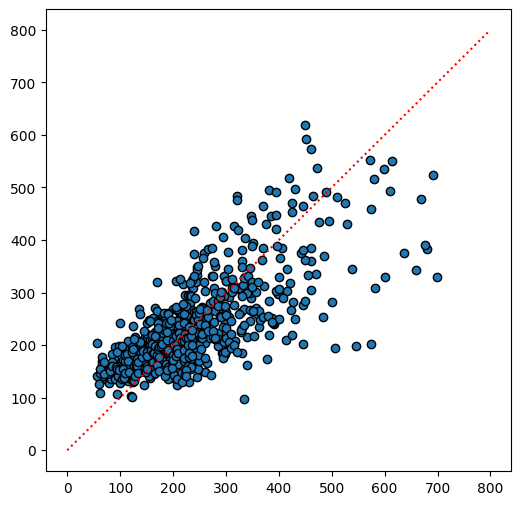

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.scatter(price, np.matmul(A, theta), edgecolor="k")
plt.plot(range(800), range(800), "r:")
plt.show()
plt.close(fig)

In [ ]:
# Define the rms function
def rms(x):
    return np.sqrt(np.mean(np.square(x)))

N = len(price)

# Stack the features (bias term, area, beds)
X = np.hstack((np.vstack(np.ones(N)), np.vstack(area), np.vstack(beds)))

# Set up 5-fold cross-validation
nfold = 5
I = np.random.permutation(N)
nfold_data = []

for k in range(nfold):
    Itest = I[k * (N // nfold) : (k + 1) * int(N / nfold)]
    Itrain = np.setdiff1d(I, Itest)
    nfold_data.append([Itrain, Itest])

# Perform cross-validation
coeff = []
rms_train_list = []
rms_test_list = []

for k in range(nfold):
    Itrain, Itest = nfold_data[k]
    theta = np.linalg.lstsq(X[Itrain, :], price[Itrain], rcond=None)[0]
    coeff.append(theta)

    rms_train = rms(np.matmul(X[Itrain, :], theta) - price[Itrain])
    rms_test = rms(np.matmul(X[Itest, :], theta) - price[Itest])

    rms_train_list.append(rms_train)
    rms_test_list.append(rms_test)

# Display the results
# print("Coefficients for each fold:\n", np.array(coeff))
print("RMS on training set for each fold:\n", np.array(rms_train_list)[:, np.newaxis])
print("RMS on test set for each fold:\n", np.array(rms_test_list)[:, np.newaxis])

# Calculate the average RMS across all folds
avg_rms_train = np.mean(rms_train_list)
avg_rms_test = np.mean(rms_test_list)

print("\nAverage RMS on training set:", avg_rms_train)
print("Average RMS on test set:", avg_rms_test)

RMS on training set for each fold:
 [[73.81401307]
 [76.10673354]
 [76.24414616]
 [73.27052694]
 [74.36482082]]
RMS on test set for each fold:
 [[79.20959593]
 [69.72574465]
 [69.27442   ]
 [81.17787987]
 [76.90716474]]

Average RMS on training set: 74.76004810440334
Average RMS on test set: 75.25896103869195


### Feature engineering

#### Adding new features to get a richer model.

In many cases the basis functions include the constant one, i.e., we have $f_1(x)=1$. (This is equivalent to having the offset in the basic regression model.) It is also very common to include the original features as well, as in $f_i(x)=x_{i-1}, i=2, \ldots, n+1$. If we do this, we are effectively starting with the basic regression model; we can then add new features to get a richer model. In this case we have $p>n$, so there are more mapped features than original features. (Whether or not it is a good idea to add the new features can be determined by out-of-sample validation or cross-validation.)

#### Dimension reduction.

In some cases, and especially when the number $n$ of the original features is very large, the feature mappings are used to construct a smaller set of $p<n$ features. In this case we can think of the feature mappings or basis functions as a dimension reduction or data aggregation procedure.

In [ ]:
np.unique(house_sales["location"])

array([1, 2, 3, 4])

In [ ]:
price, area, beds, condo, location = (
    house_sales["price"],
    house_sales["area"],
    house_sales["beds"],
    house_sales["condo"],
    house_sales["location"],
)

N = len(price)
a = np.vstack(np.ones(N))
b = np.vstack(area)
# c = np.vstack([max(i - 1.5, 0) for i in np.hstack(area)])
d = np.vstack(beds)
e = np.vstack(condo)
f = np.vstack(location)
# f1 = np.vstack(location == 1).astype(int)
# f2 = np.vstack(location == 2).astype(int)
# f3 = np.vstack(location == 3).astype(int)
# f4 = np.vstack(location == 4).astype(int)

# # z-score normalization
b = (b - np.mean(b)) / np.std(b)
# c = (c - np.mean(c)) / np.std(c)
# d = (d - np.mean(d)) / np.std(d)
# e = (e - np.mean(e)) / np.std(e)

X = np.hstack((a, b, d, e, f))

theta = np.linalg.lstsq(X, price, rcond=None)[0]
rms(np.matmul(X, theta) - price)

74.43863021800561

In [ ]:
# Set up 5-fold cross-validation
nfold = 5
I = np.random.permutation(N)
nfold_data = []

for k in range(nfold):
    Itest = I[k * int(N / nfold) : (k + 1) * int(N / nfold)]
    Itrain = np.setdiff1d(I, Itest)
    nfold_data.append([Itrain, Itest])

# Perform cross-validation
coeff = []
rms_train_list = []
rms_test_list = []

for k in range(nfold):
    Itrain, Itest = nfold_data[k]
    theta = np.linalg.lstsq(X[Itrain, :], price[Itrain], rcond=None)[0]
    coeff.append(theta)

    rms_train = rms(np.matmul(X[Itrain, :], theta) - price[Itrain])
    rms_test = rms(np.matmul(X[Itest, :], theta) - price[Itest])

    rms_train_list.append(rms_train)
    rms_test_list.append(rms_test)

# Display the results
print("Coefficients for each fold:\n", np.array(coeff))
print("RMS on training set for each fold:\n", rms_train_list)
print("RMS on test set for each fold:\n", rms_test_list)

# Calculate the average RMS across all folds
avg_rms_train = np.mean(rms_train_list)
avg_rms_test = np.mean(rms_test_list)

print("\nAverage RMS on training set:", avg_rms_train)
print("Average RMS on test set:", avg_rms_test)

Coefficients for each fold:
 [[159.96668042 144.83645666   5.01440552 -49.43813593   6.62116078]
 [183.53643825 152.12375764  -1.45885225 -61.19021454   5.09323524]
 [139.86757921 149.29892553   4.88032106 -50.89573208  13.65975722]
 [162.4028617  146.56616584  -0.21458565 -48.49693838  11.5242952 ]
 [153.88869674 148.91178846   2.70860303 -44.19987161   9.79834515]]
RMS on training set for each fold:
 [82.97238677437355, 79.95142725788037, 78.61277715258981, 82.06889479520983, 79.51410122373264]
RMS on test set for each fold:
 [71.44128349358637, 84.44224761605167, 89.37234871092654, 75.52611218974995, 85.84355317889184]

Average RMS on training set: 80.62391744075724
Average RMS on test set: 81.32510903784127
